# ATLAS AD TRIGGERS: POST HLT PLOTS

**Author:** Claire  
**Date:** 2024-12-05 
**Goals:** 
- Data inspection  
- Plot distributions post HLT-AD trigger for objects  
- See the "physics" that the HLT-AD trigger is selecting

**Files:** Ntuples from Max with AD scores. Object pT rescaled to original values.

## Setup

In [1]:
# %% [python]
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Custom modules
import utils.dataframes_loader as df_loader
import utils.data_inspector as di
import utils.plot_utils as pu

    
data_dir = '/Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/'

## Loading data
Storing each dataset-tag (EB_test and signals) in a dataframe.

In [2]:
# Load dataframes
dataframes = df_loader.load_dataframes_from_h5(data_dir)

Loaded jjJZ1 from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/jjJZ1.h5
Loaded EB_test from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/EB_test.h5
Loaded jjJZ4 from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/jjJZ4.h5
Loaded A14N23LO from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/A14N23LO.h5
Loaded qqa from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/qqa.h5
Loaded HAHMggfZdZd2l2nu from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/HAHMggfZdZd2l2nu.h5
Loaded jjJZ2 from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/jjJZ2.h5
Loaded ZZ4lep from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/ZZ4lep.h5
Loaded Zprime2EJs from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores/Zprime2EJs.h5
Loaded HHbbttHadHad from /Users/c

# Data inspection
Focusing on `EB_test` for now. 
For some events, MET was not calculated, so was written as -999.  
Mapping: 0 $\rightarrow$ 0.001 and -999 $\rightarrow$ 0



In [3]:
di.print_tables_pt_ranges(dataframes, 'EB_test')


Jets pT ranges for EB_test (percentages)
----------------------------------------------------------------------------------------------------
Range            j0pt          j1pt          j2pt          j3pt          j4pt          j5pt          
----------------------------------------------------------------------------------------------------
pt = 0           0.0%          0.1%          0.3%          0.8%          1.8%          2.9%     
0 < pt < 50     52.8%         69.8%         89.9%         97.1%         97.9%         97.0%     
pt ≥ 50         47.1%         30.1%          9.7%          2.1%          0.4%          0.1%     
----------------------------------------------------------------------------------------------------

Leptons pT ranges for EB_test (percentages)
----------------------------------------------------------------------------------------------------
Range            e0pt          e1pt          e2pt          mu0pt         mu1pt         mu2pt         
--------------

Lots of events are not assigned a MET. Out of curiosity, let's compute manually a MET value and compare.

In [4]:
di.print_event(dataframes['EB_test'], event_idx=25)


Event 25 Details:
-----------------------------------------------------------------
Object            pT [GeV]          η          φ
-----------------------------------------------------------------
MET                   53.1       0.00      3.015
e0                    37.6       0.32     -0.043
e1                    37.6       0.32     -0.043
e2                     4.3       0.24     -0.007
j0                   110.1       0.30      0.000
j1                    88.4      -3.04      3.114
j2                    17.8       0.00      0.000
j3                    11.7       0.00      0.000
j4                     0.0       0.00      0.000
j5                     0.0       0.00      0.000
mu0                    0.0       0.00      0.000
mu1                    0.0       0.00      0.000
mu2                    0.0       0.00      0.000
ph0                   37.8       0.29      0.049
ph1                   37.8       0.29      0.049
ph2                   37.8       0.29      0.049
----------------


Detailed object list for Event 25:
----------------------------------------------------------------------
Object            pT [GeV]          φ       Used
----------------------------------------------------------------------
j0                   110.1      0.000       used
j1                    88.4      3.114       used
j2                    17.8      0.000       used
j3                    11.7      0.000       used
j4                     0.0      0.000  skip-zero
j5                     0.0      0.000  skip-zero
e0                    37.6     -0.043       used
e1                    37.6     -0.043  duplicate
e2                     4.3     -0.007       used
mu0                    0.0      0.000  skip-zero
mu1                    0.0      0.000  skip-zero
mu2                    0.0      0.000  skip-zero
ph0                   37.8      0.049       used
ph1                   37.8      0.049  duplicate
ph2                   37.8      0.049  duplicate
--------------------------------------

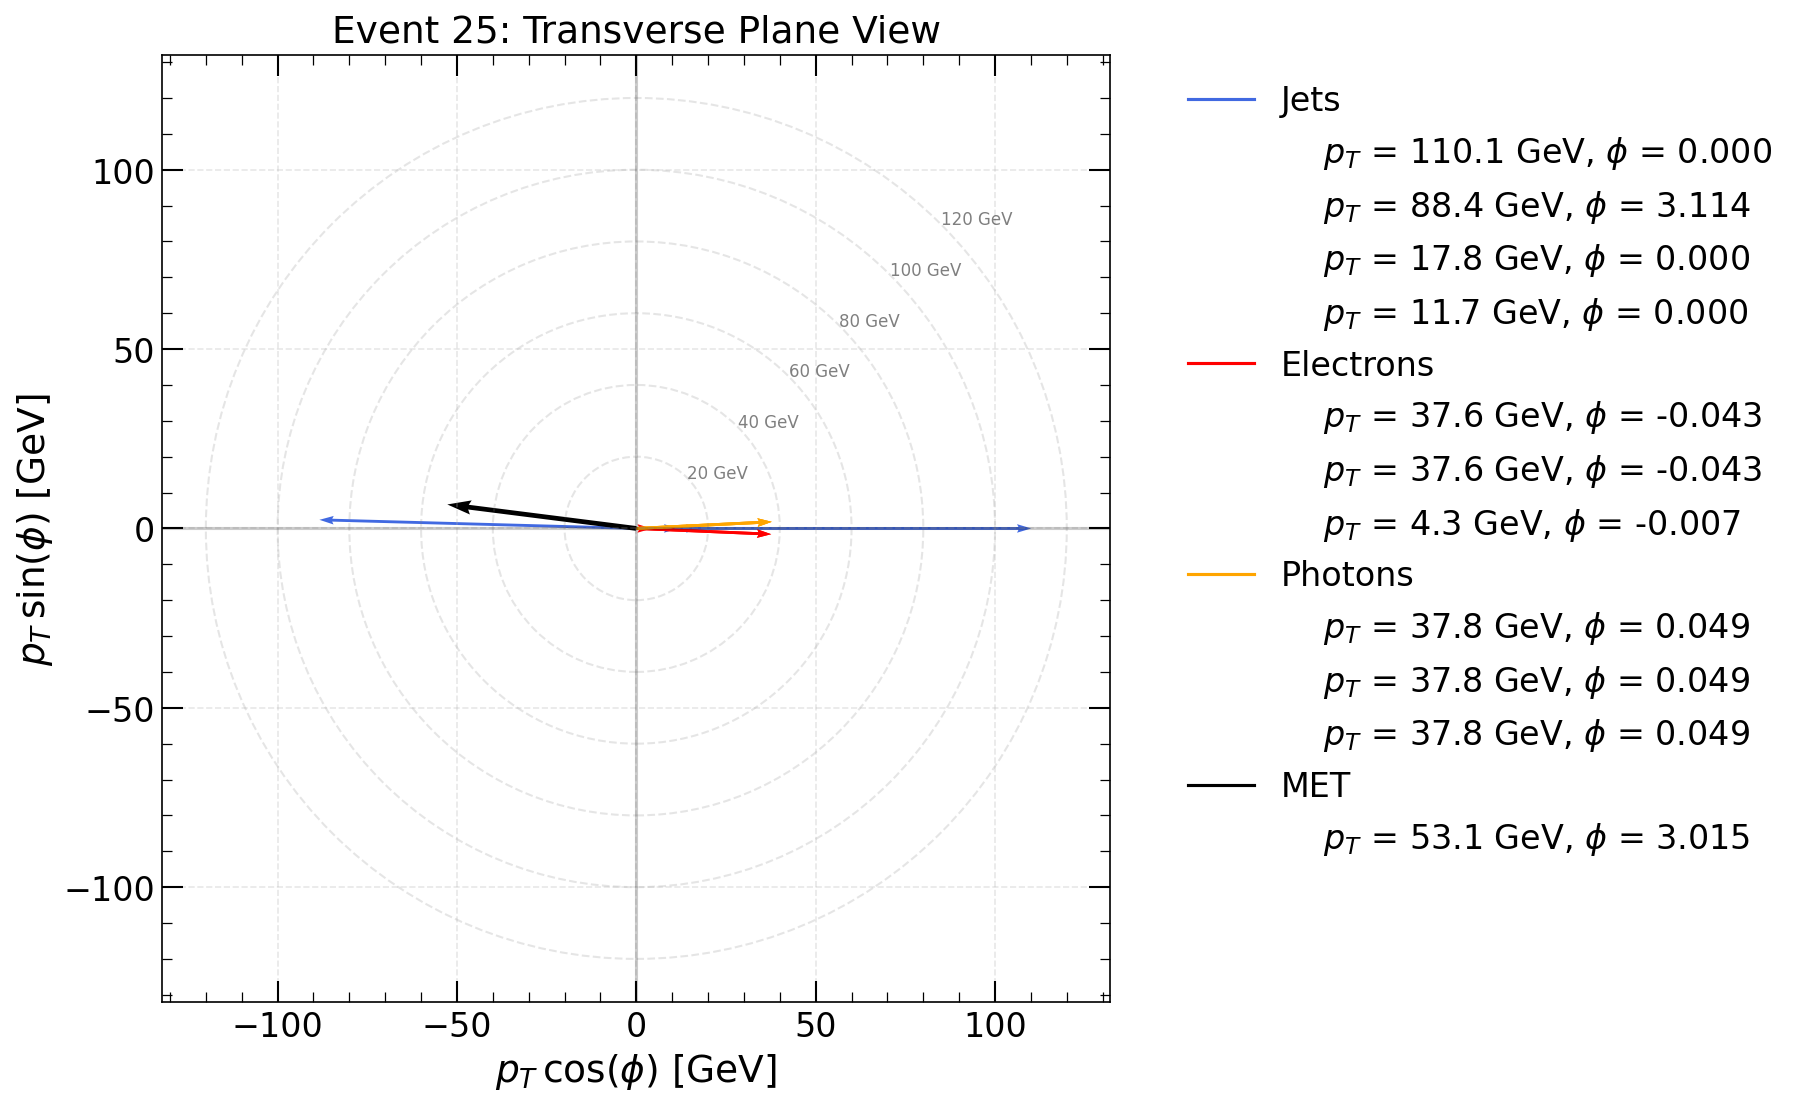

In [5]:
pu.plot_event_2D(dataframes['EB_test'], event_idx=25)
manualMET , manualPhi = di.get_manual_MET(dataframes['EB_test'], event_idx=25, debug=True)


Detailed object list for Event 33:
----------------------------------------------------------------------
Object            pT [GeV]          φ       Used
----------------------------------------------------------------------
j0                   208.7      0.000       used
j1                   127.3     -2.057       used
j2                   100.5     -3.103       used
j3                    89.9      2.676       used
j4                    80.4      1.548       used
j5                    32.6      0.000       used
e0                    58.9      0.103       used
e1                    58.9      0.103  duplicate
e2                    58.9      0.103  duplicate
mu0                    0.0      0.000  skip-zero
mu1                    0.0      0.000  skip-zero
mu2                    0.0      0.000  skip-zero
ph0                   57.5      0.085       used
ph1                   57.5      0.085  duplicate
ph2                   57.5      0.085  duplicate
--------------------------------------

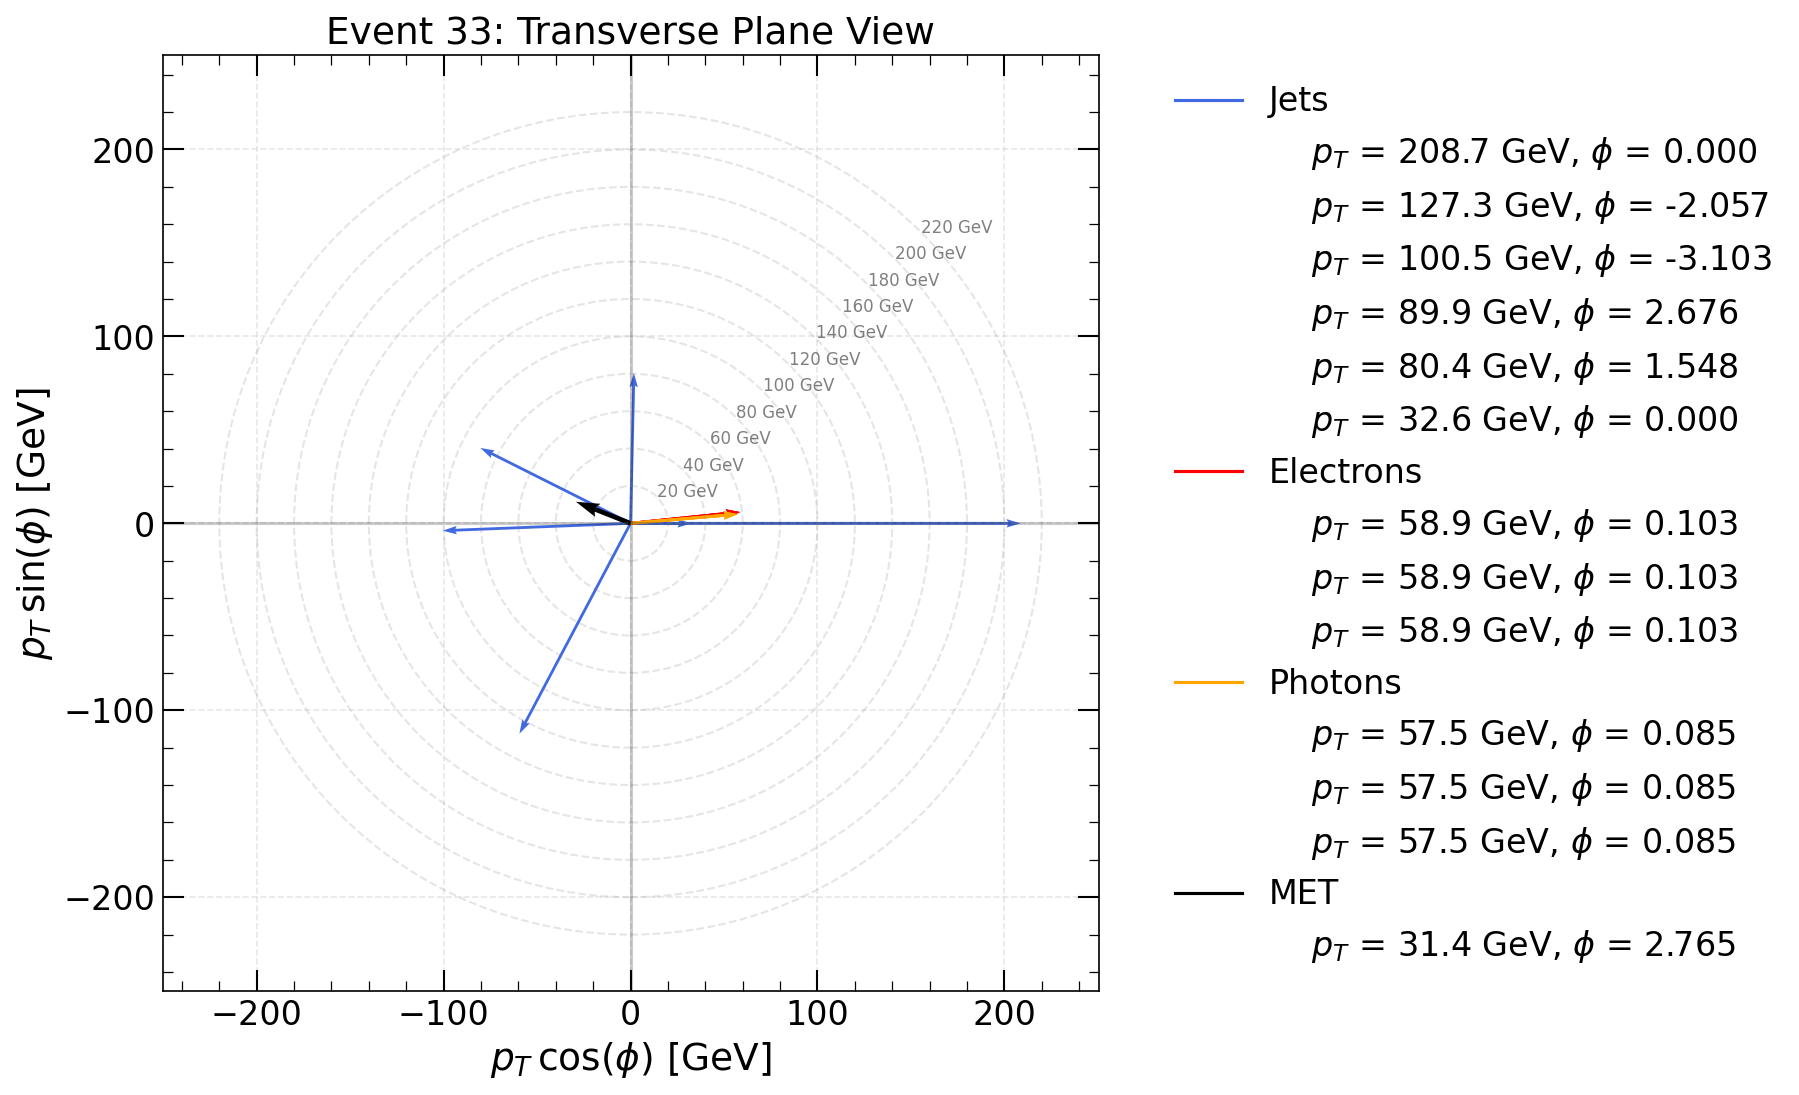

In [6]:
pu.plot_event_2D(dataframes['EB_test'], event_idx=33)
manualMET , manualPhi = di.get_manual_MET(dataframes['EB_test'], event_idx=33, debug=True)


Detailed object list for Event 123:
----------------------------------------------------------------------
Object            pT [GeV]          φ       Used
----------------------------------------------------------------------
j0                    36.8      0.000       used
j1                    24.8      0.000       used
j2                    16.5      0.000       used
j3                    14.9      0.000       used
j4                    12.5      0.000       used
j5                    10.4      0.000       used
e0                    12.3     -0.004       used
e1                    12.3     -0.004  duplicate
e2                     6.5     -0.922       used
mu0                    0.0      0.000  skip-zero
mu1                    0.0      0.000  skip-zero
mu2                    0.0      0.000  skip-zero
ph0                    9.6      0.069       used
ph1                    9.6      0.069  duplicate
ph2                    5.9     -0.872       used
-------------------------------------

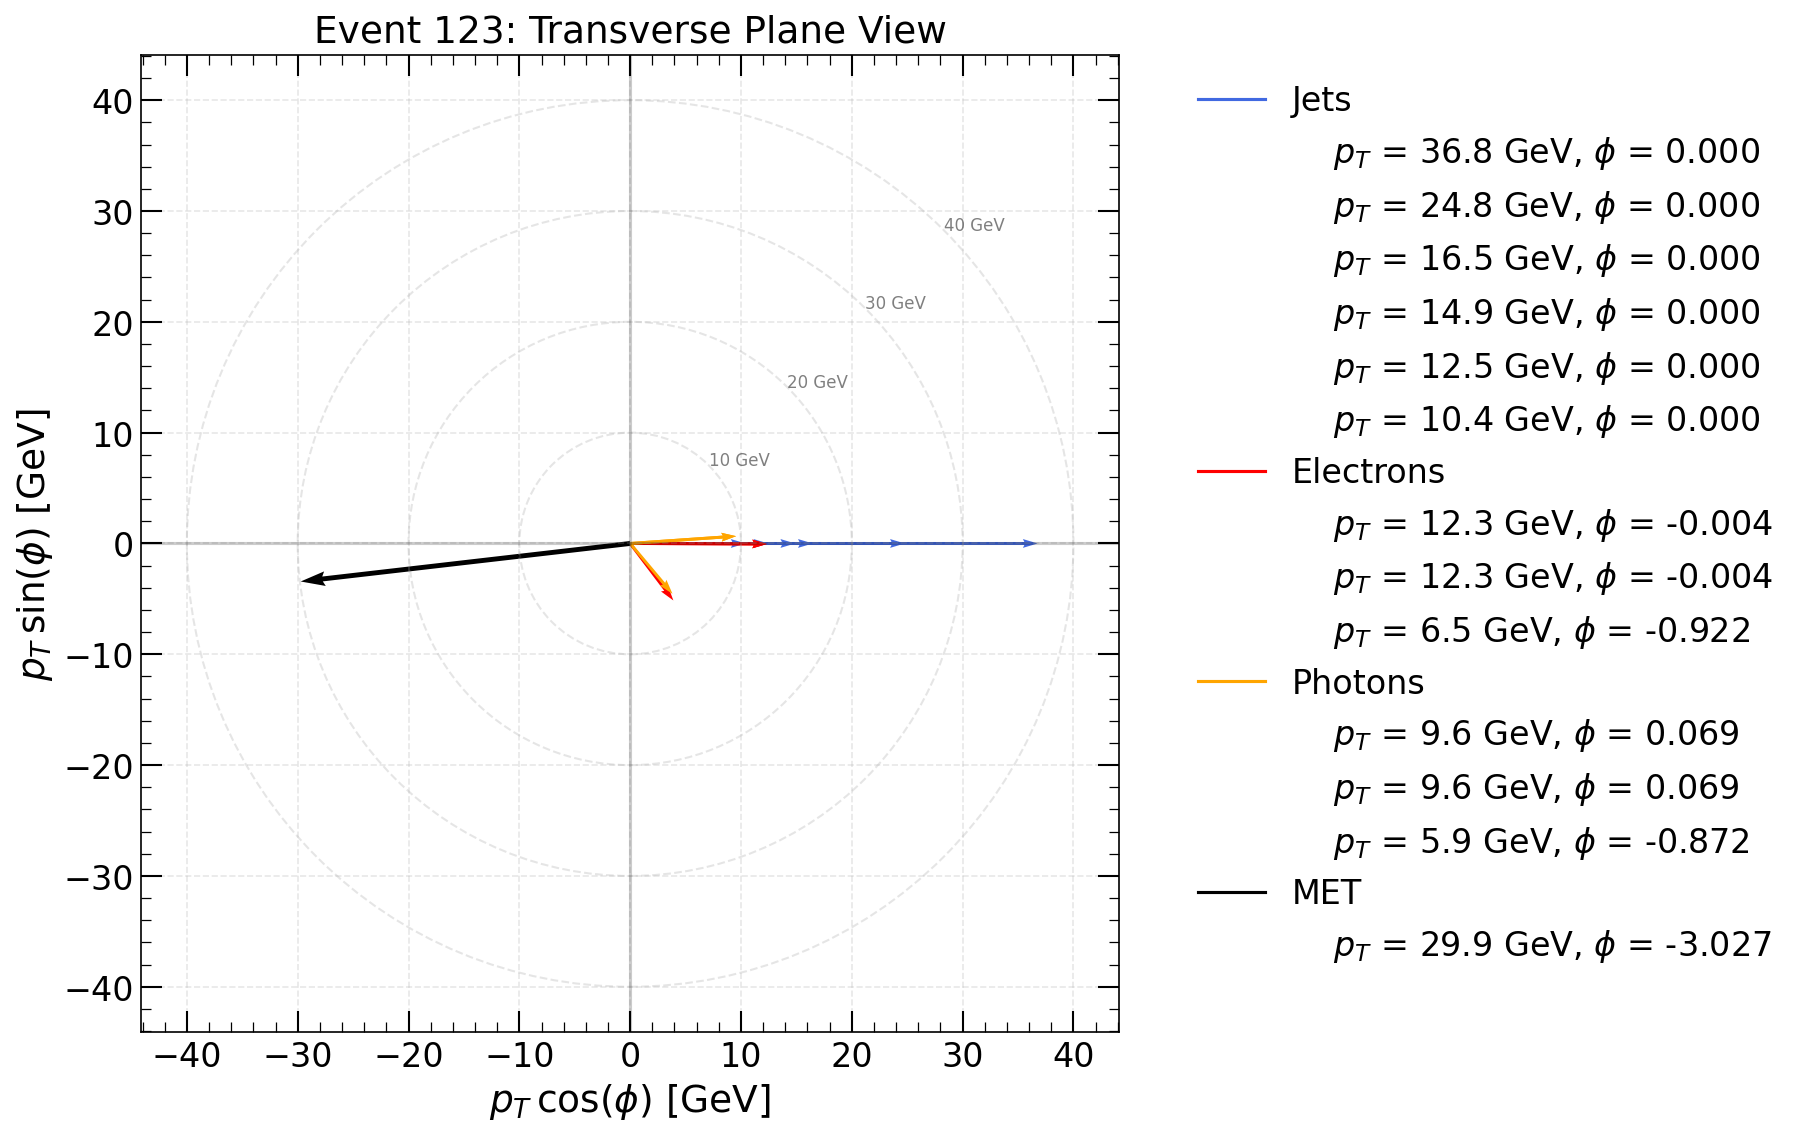

In [7]:
pu.plot_event_2D(dataframes['EB_test'], event_idx=123)
manualMET , manualPhi = di.get_manual_MET(dataframes['EB_test'], event_idx=123, debug=True)

## AD scores
Exploring the 5 orders of magnitude of AD scores.

Test: n_events_range1 = 535316407.8337002 | raw events = 486764
Test: n_events_range2 = 17926047.523500003 | raw events = 20853
Test: n_events_range3 = 109334.4995 | raw events = 1498
Test: n_events_range4 = 3351.4619 | raw events = 52


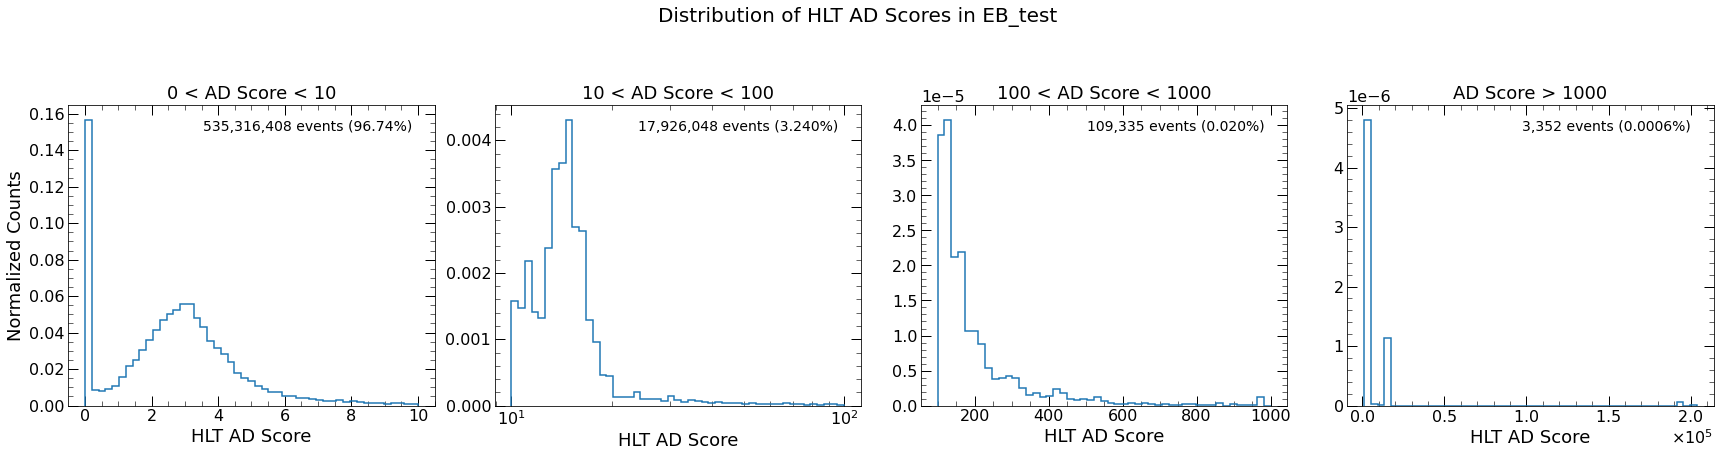


HLT AD Scores: Statistics for EB_test:
Mean: 3.2061  (unweighted: 5.5495)
Std: 56.8833  (unweighted: 398.1612)
Min: 0.0000
Max: 203889.1458


In [8]:
pu.plot_AD_scores_4_parts(dataframes, 'EB_test')

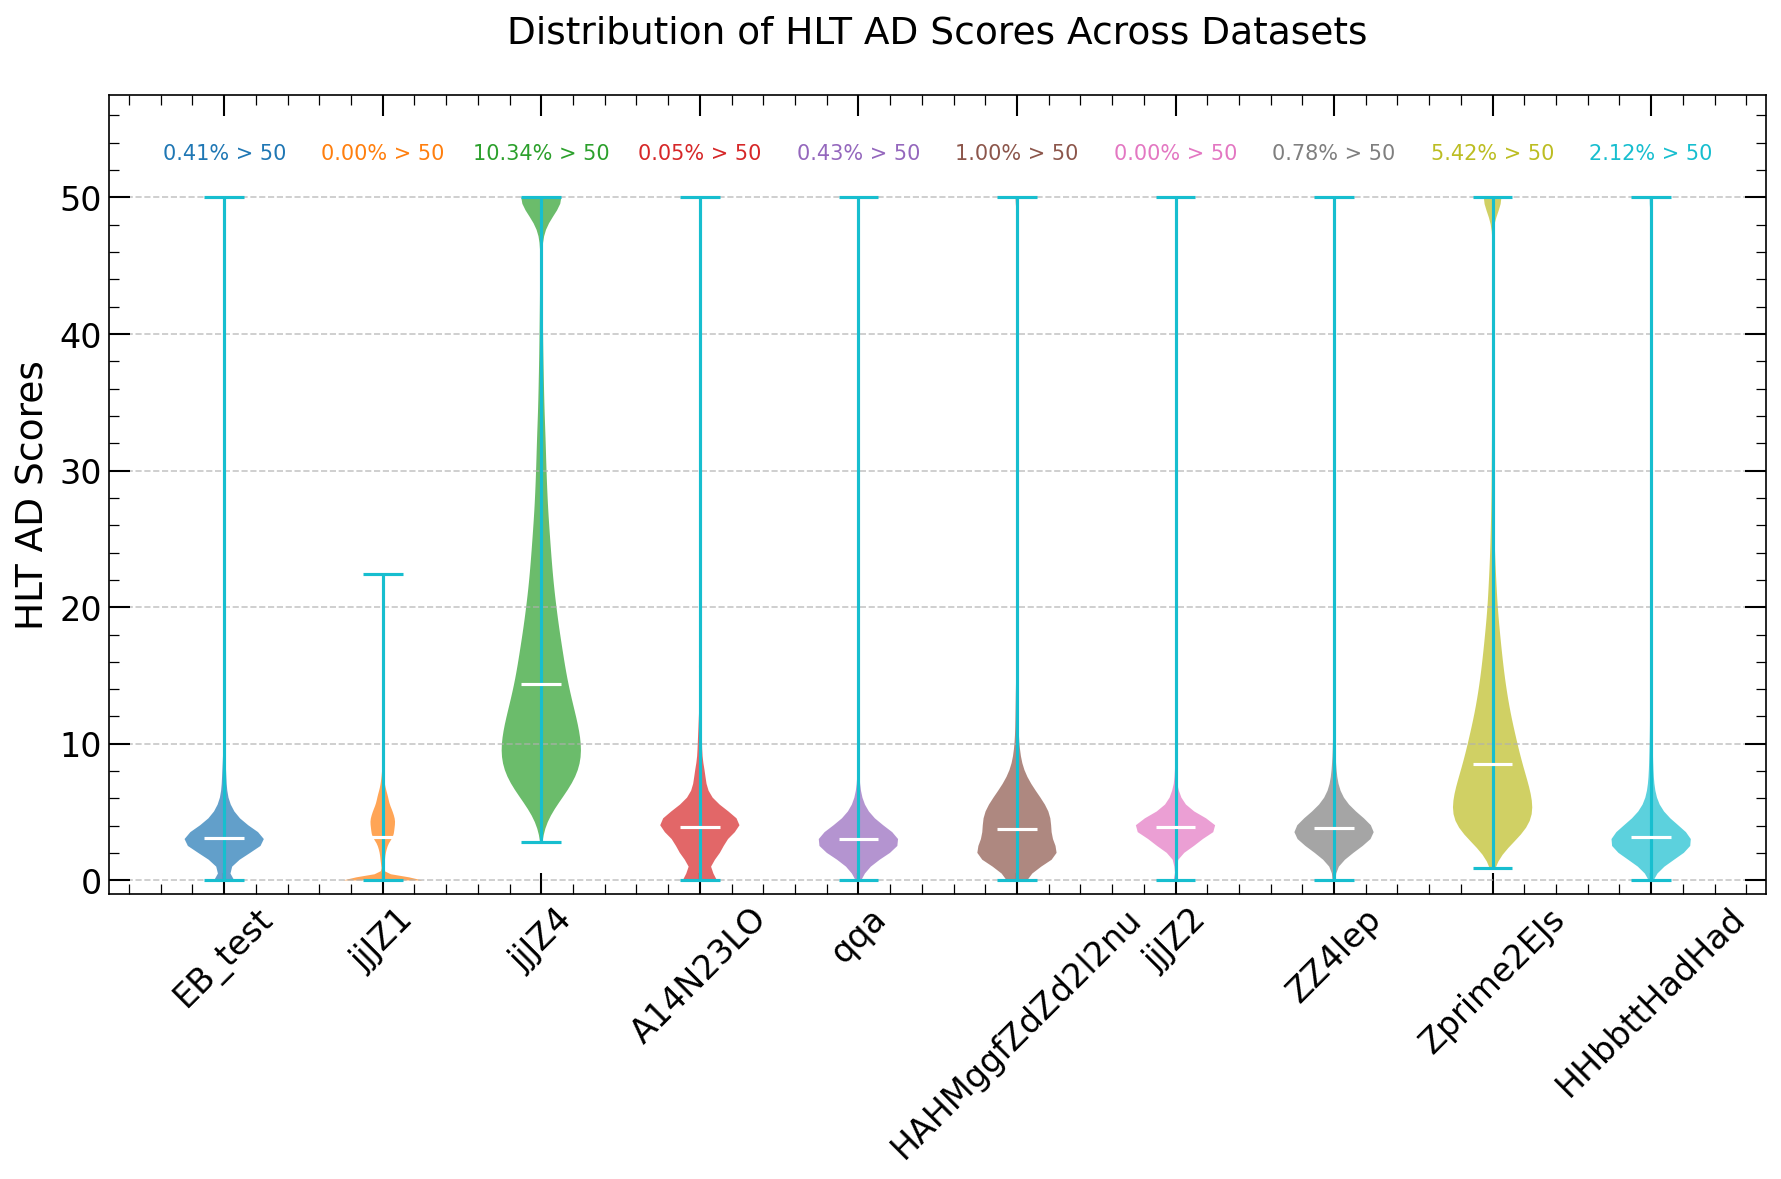


AD Score Statistics:
              EB_test  jjJZ1    jjJZ4  A14N23LO      qqa  HAHMggfZdZd2l2nu   jjJZ2   ZZ4lep  Zprime2EJs  HHbbttHadHad
Mean             5.55   2.81    51.30      4.21     4.13              5.93    4.01     5.49       21.23          7.30
Median           3.12   3.21    14.40      3.90     3.00              3.80    3.89     3.81        8.55          3.17
Std Dev        398.16   2.48   130.24      8.74    16.11             25.34    1.75    13.04       62.56         21.05
Min              0.00   0.00     2.84      0.00     0.00              0.00    0.00     0.00        0.89          0.00
Max         203889.15  22.41  1778.45    757.20  2778.58           3195.43  164.19  1151.27     2891.18       1750.80
% above 50       0.41   0.00    10.34      0.05     0.43              1.00    0.00     0.78        5.42          2.12


In [9]:
pu.plot_AD_scores_violin(dataframes, score_limit=50)

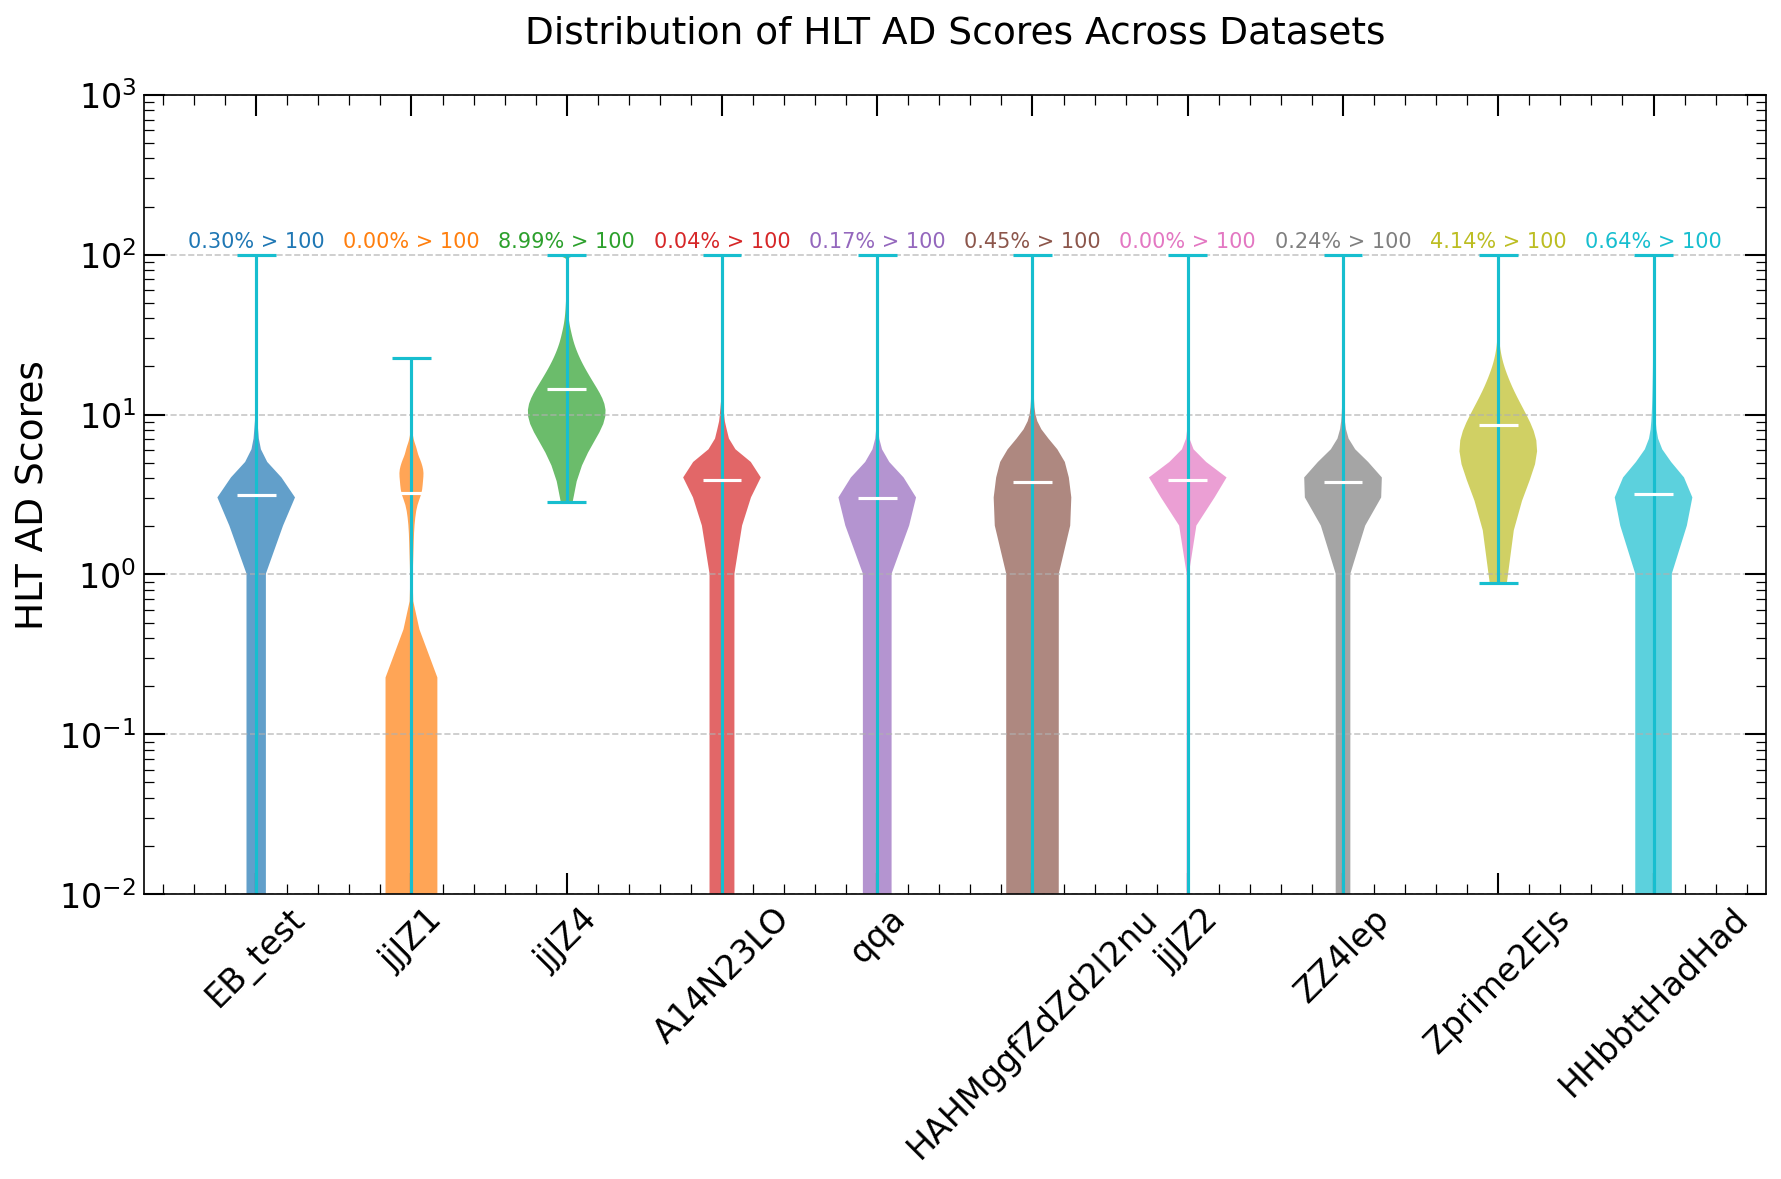


AD Score Statistics:
               EB_test  jjJZ1    jjJZ4  A14N23LO      qqa  HAHMggfZdZd2l2nu   jjJZ2   ZZ4lep  Zprime2EJs  HHbbttHadHad
Mean              5.55   2.81    51.30      4.21     4.13              5.93    4.01     5.49       21.23          7.30
Median            3.12   3.21    14.40      3.90     3.00              3.80    3.89     3.81        8.55          3.17
Std Dev         398.16   2.48   130.24      8.74    16.11             25.34    1.75    13.04       62.56         21.05
Min               0.00   0.00     2.84      0.00     0.00              0.00    0.00     0.00        0.89          0.00
Max          203889.15  22.41  1778.45    757.20  2778.58           3195.43  164.19  1151.27     2891.18       1750.80
% above 100       0.30   0.00     8.99      0.04     0.17              0.45    0.00     0.24        4.14          0.64


In [10]:
pu.plot_AD_scores_violin(dataframes, score_limit=100, ylog=True)

# $p_T$ for low and high AD scores

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot: title={'center': 'Distribution of Leading jet $p_T$ for low vs high AD scores'}, xlabel='Leading jet $p_T$', ylabel='Normalized Events'>)

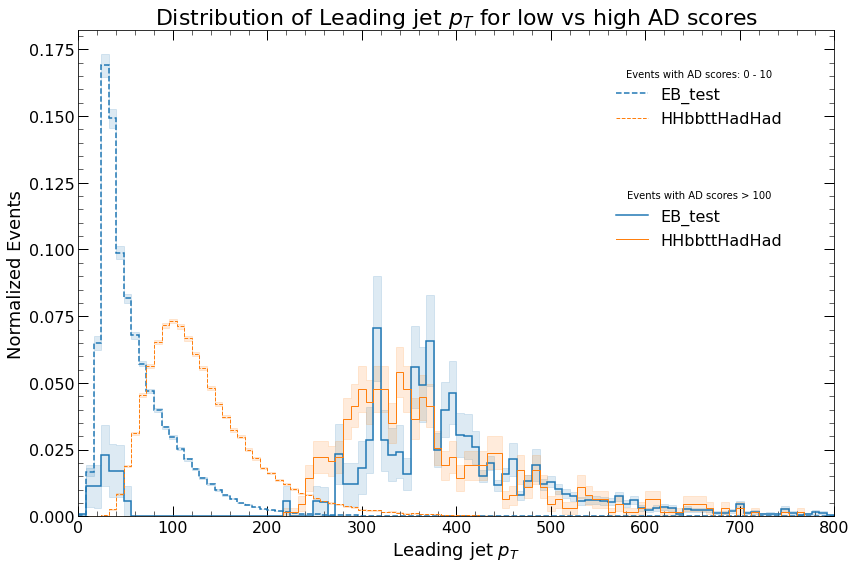

In [11]:
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test','HHbbttHadHad'], 'j0pt', 'Leading jet $p_T$', (0, 10), (100, 1e6), nbins=100, x_max=800)


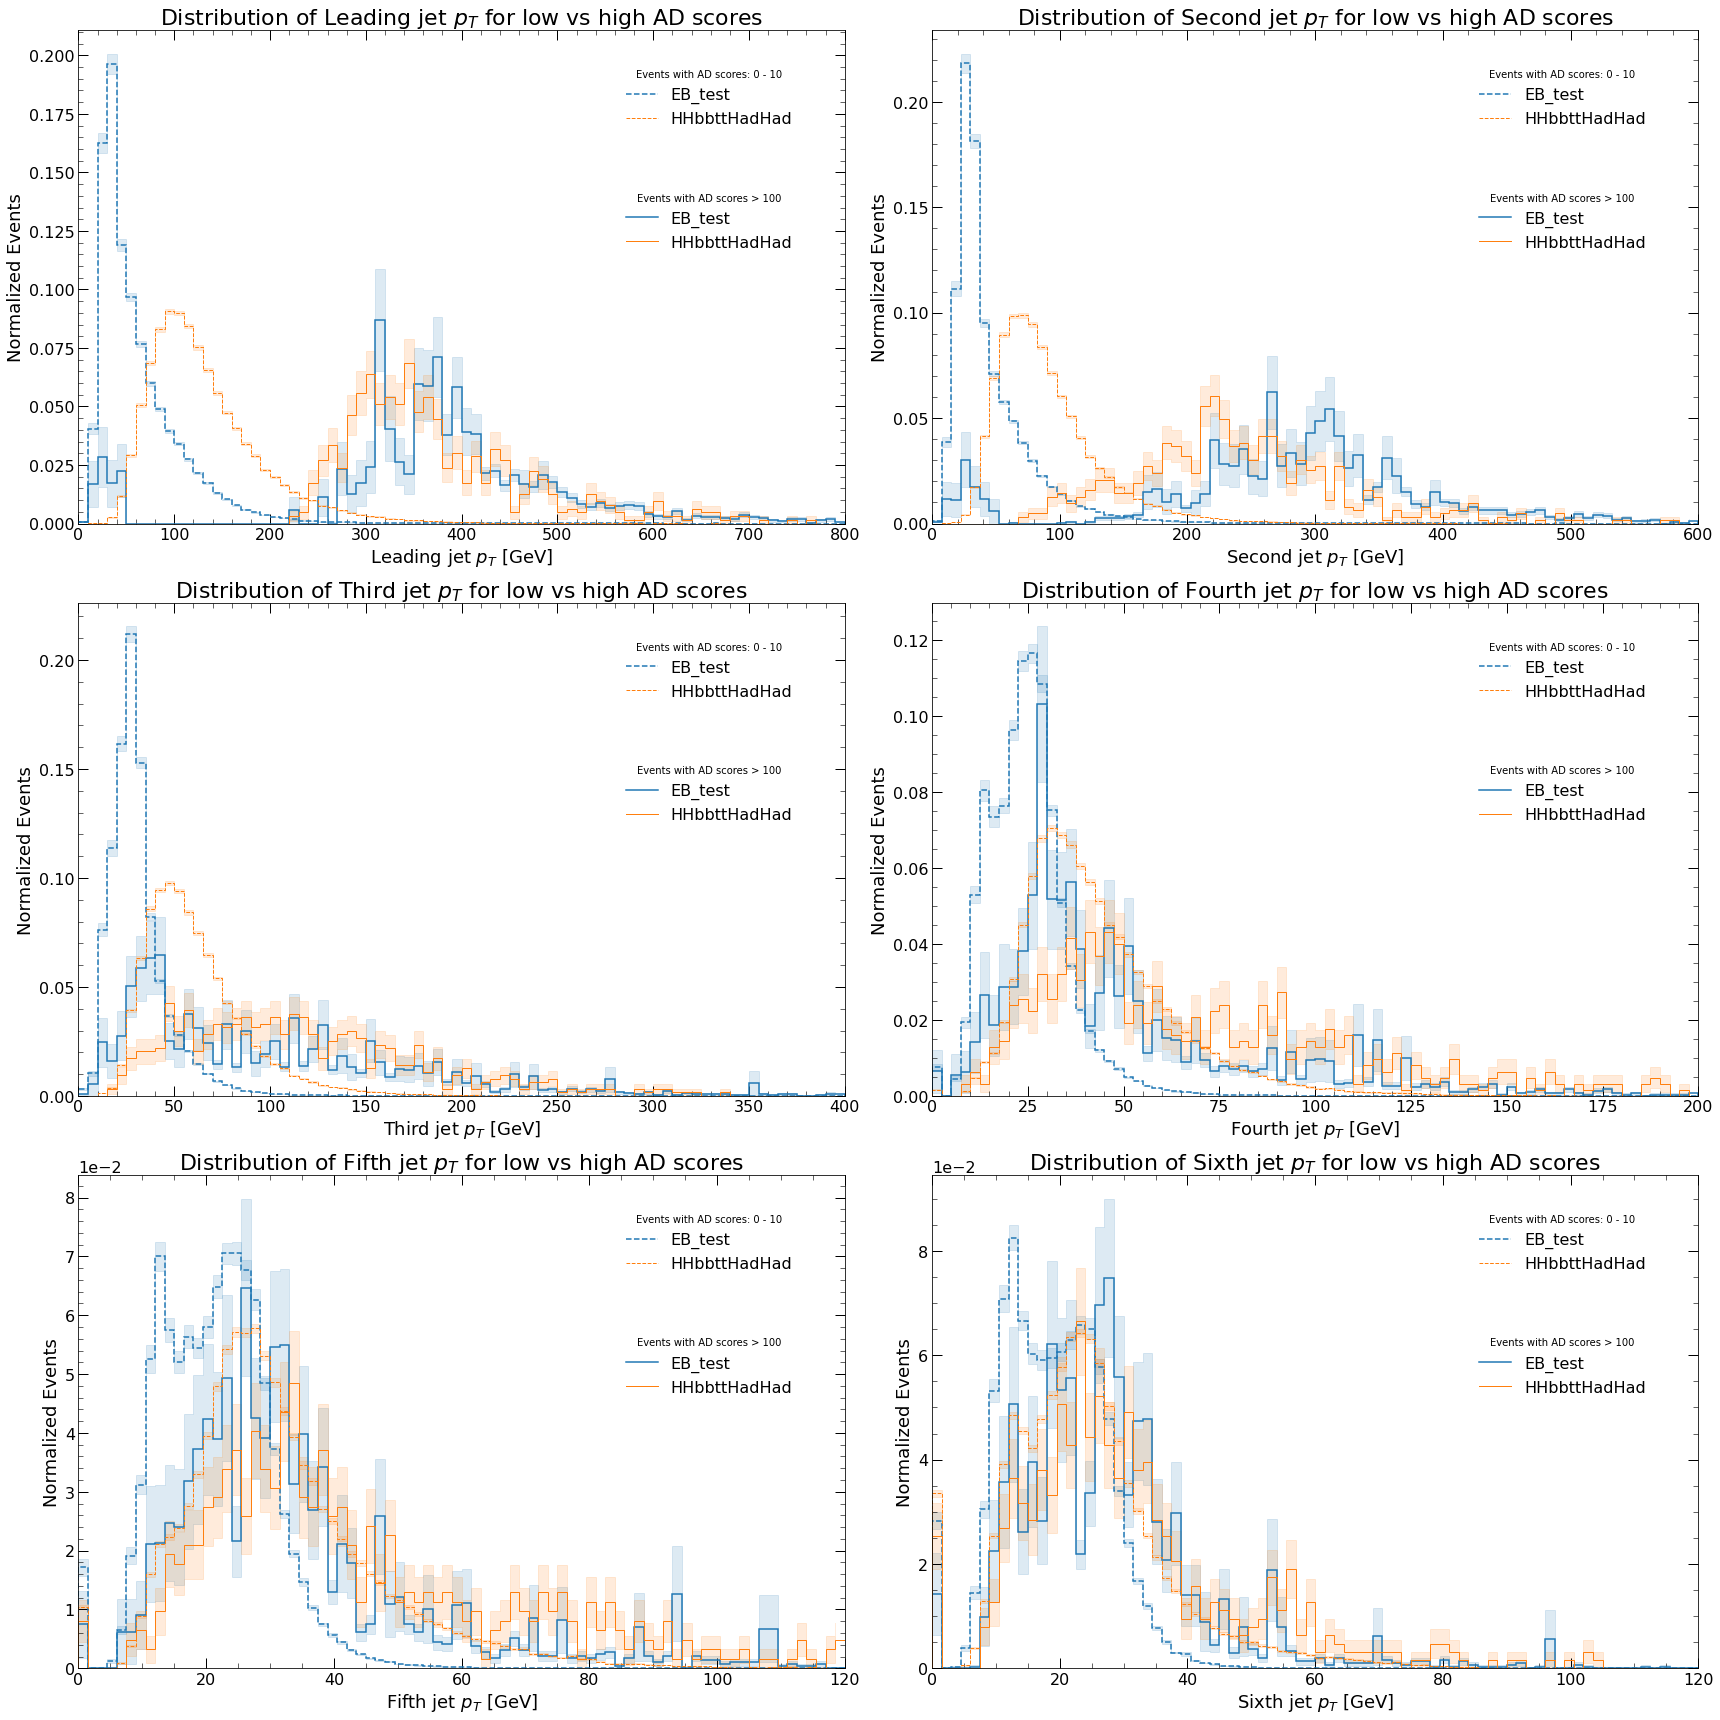

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(24, 24))

# Call the function for each subplot
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'j0pt', 'Leading jet $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=800, ax=axs[0, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'j1pt', 'Second jet $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=600, ax=axs[0, 1])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'j2pt', 'Third jet $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=400, ax=axs[1, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'j3pt', 'Fourth jet $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=200, ax=axs[1, 1])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'j4pt', 'Fifth jet $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=120, ax=axs[2, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'j5pt', 'Sixth jet $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=120, ax=axs[2, 1])

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()

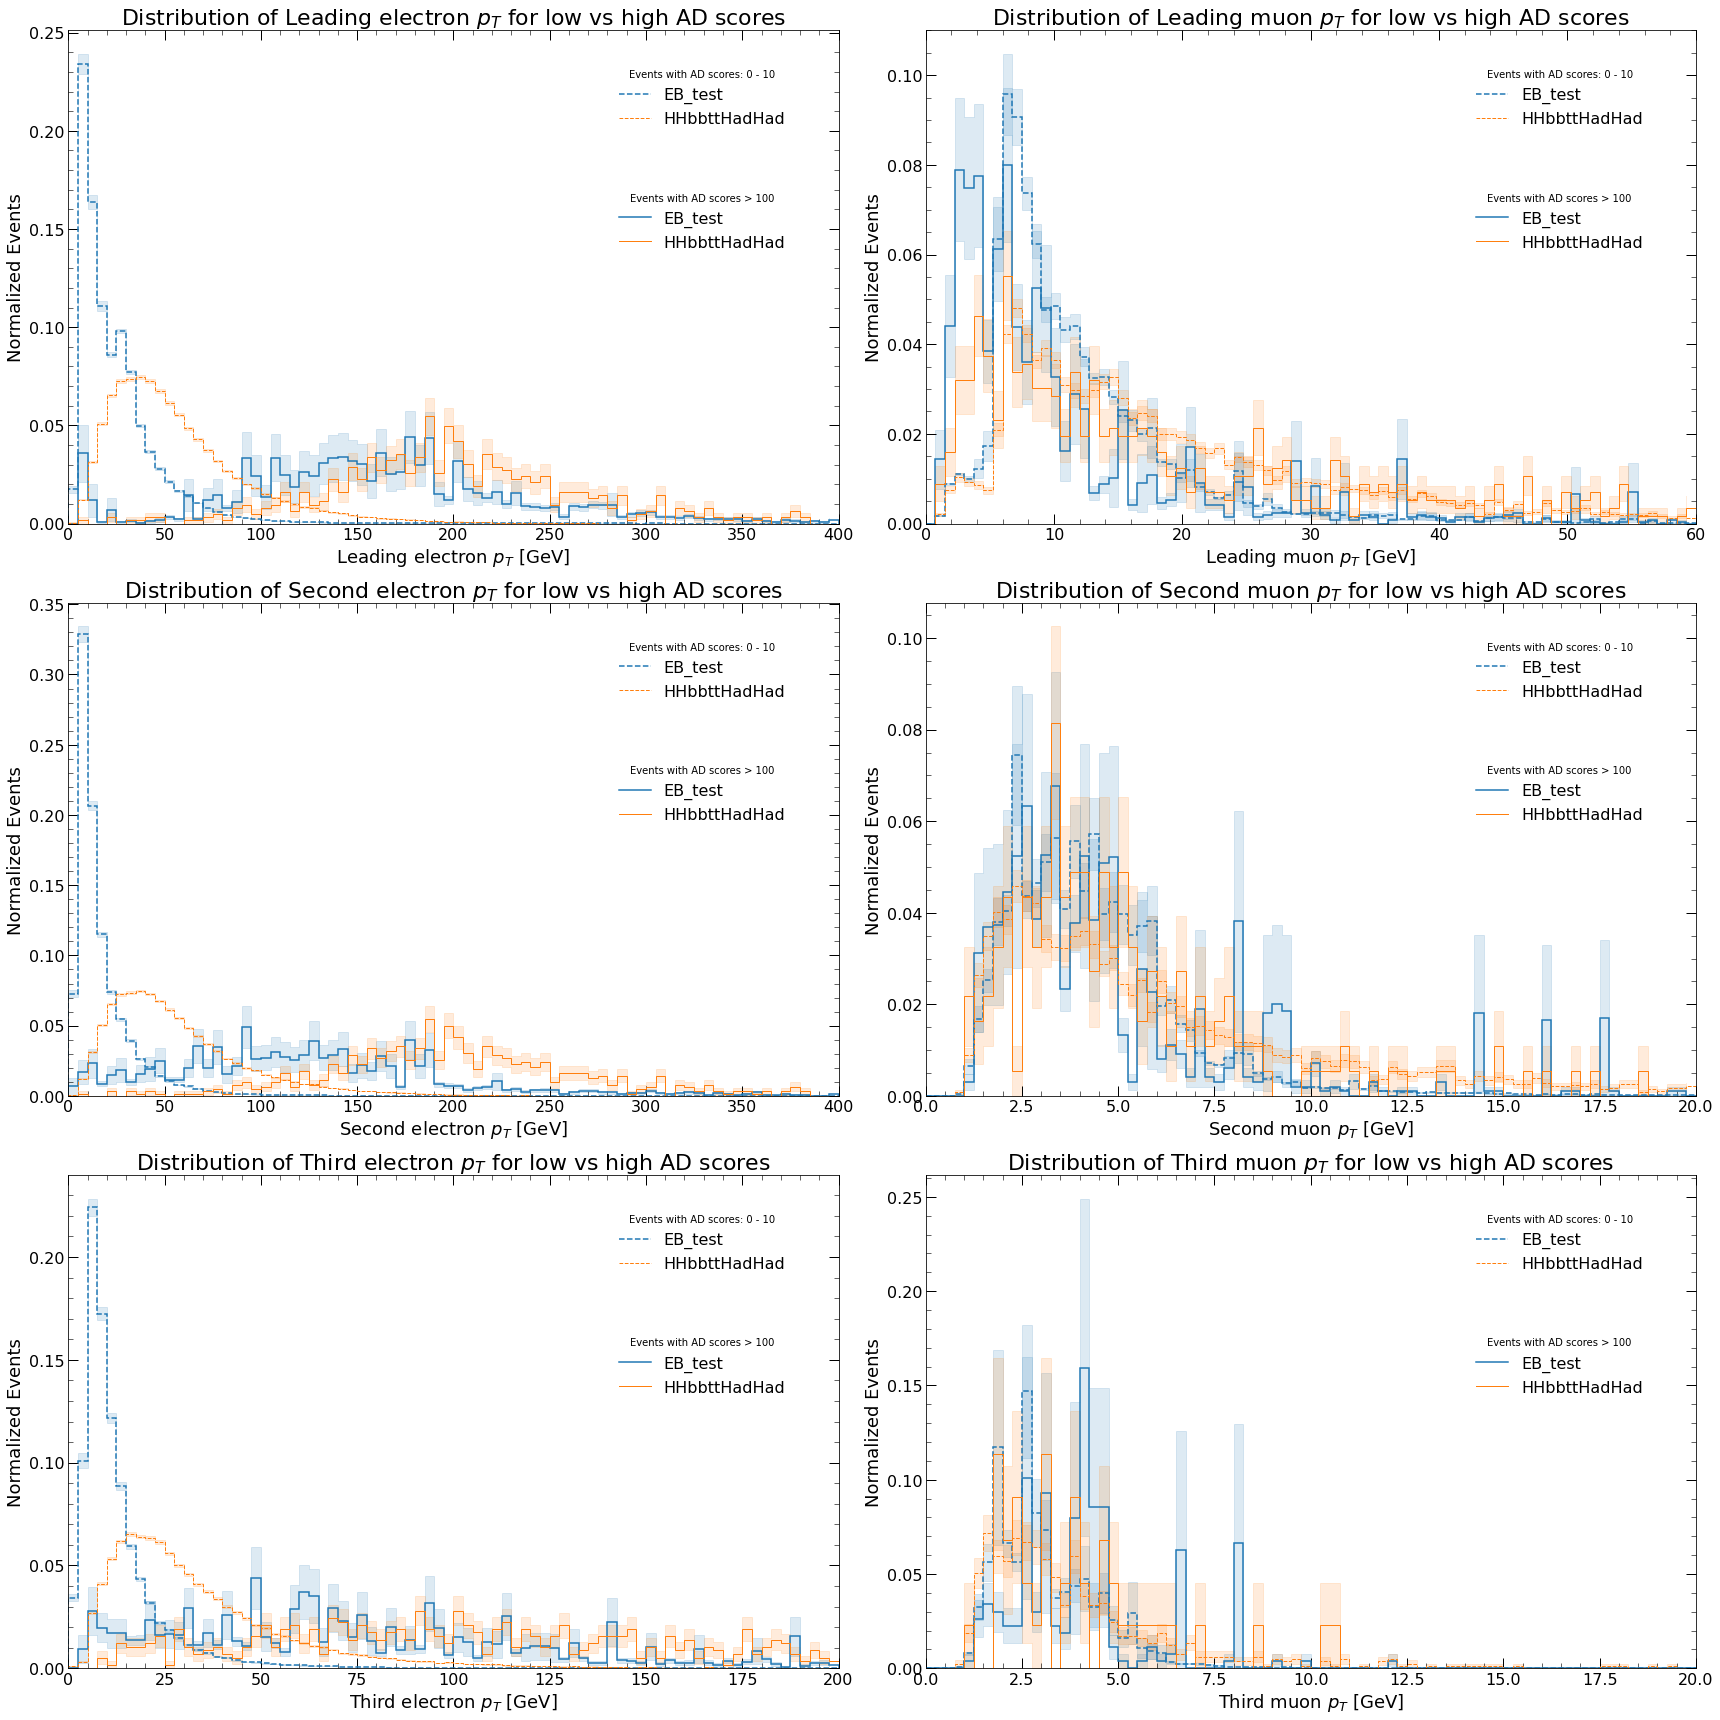

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(24, 24))

# Call the function for each subplot
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'e0pt',  'Leading electron $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=400, remove_zero_entries=True, ax=axs[0, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'mu0pt', 'Leading muon $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=60, remove_zero_entries=True, ax=axs[0, 1])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'e1pt',  'Second electron $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=400, remove_zero_entries=True, ax=axs[1, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'mu1pt', 'Second muon $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=20, remove_zero_entries=True, ax=axs[1, 1])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'e2pt',  'Third electron $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=200, remove_zero_entries=True, ax=axs[2, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'mu2pt', 'Third muon $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=20, remove_zero_entries=True, ax=axs[2, 1])

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()

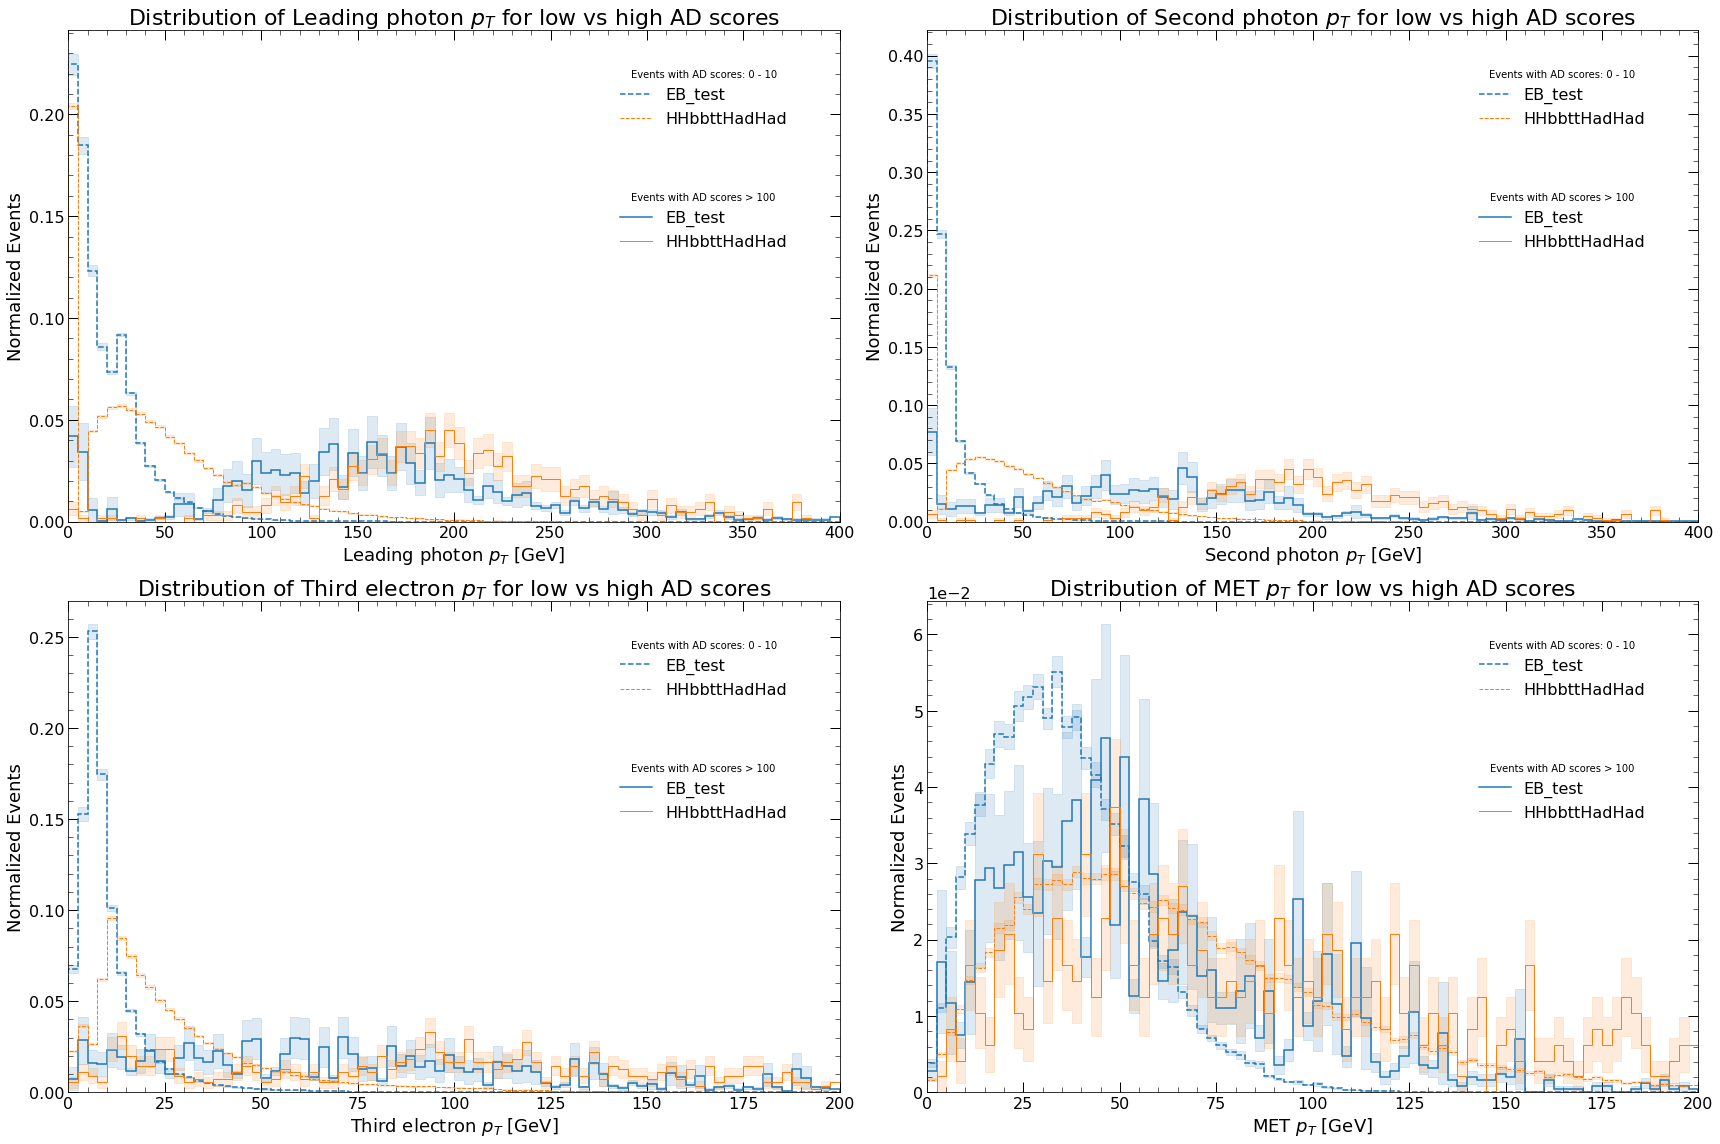

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(24, 16))

# Call the function for each subplot
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'ph0pt', 'Leading photon $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=400, ax=axs[0, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'ph1pt', 'Second photon $p_T$ [GeV]',  (0, 10), (100, 1e6), nbins=80, x_max=400, ax=axs[0, 1])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'ph2pt', 'Third electron $p_T$ [GeV]', (0, 10), (100, 1e6), nbins=80, x_max=200, remove_zero_entries=True, ax=axs[1, 0])
pu.overlay_kin_variable_2_AD_ranges_errors(dataframes, ['EB_test', 'HHbbttHadHad'], 'METpt', 'MET $p_T$ [GeV]',            (0, 10), (100, 1e6), nbins=80, x_max=200, remove_zero_entries=True, ax=axs[1, 1])

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()

With the HLT trigger information:

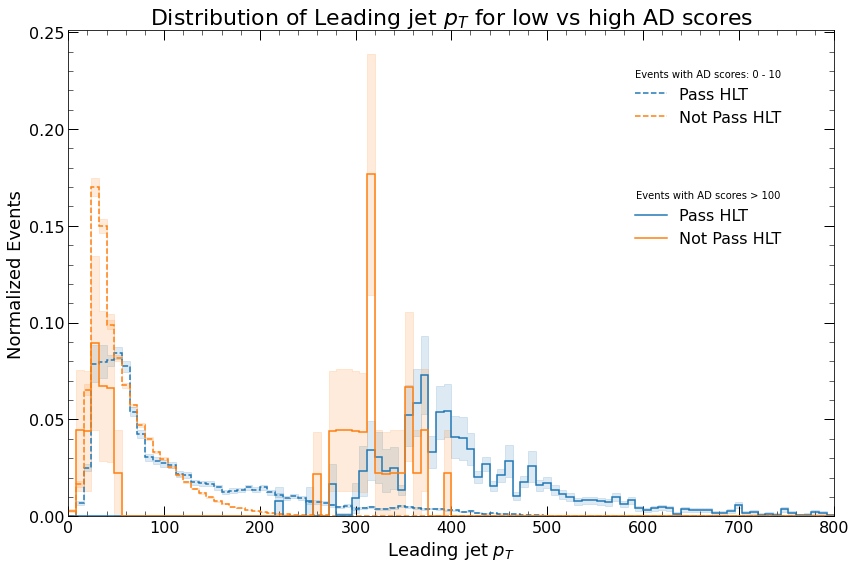

In [15]:
f, a = pu.overlay_kin_variable_2_AD_ranges_errors_HLT(dataframes, 'EB_test', 'j0pt', 'Leading jet $p_T$', (0, 10), (100, 1e6), nbins=100, x_max=800)


## AD score vs jet multiplicity

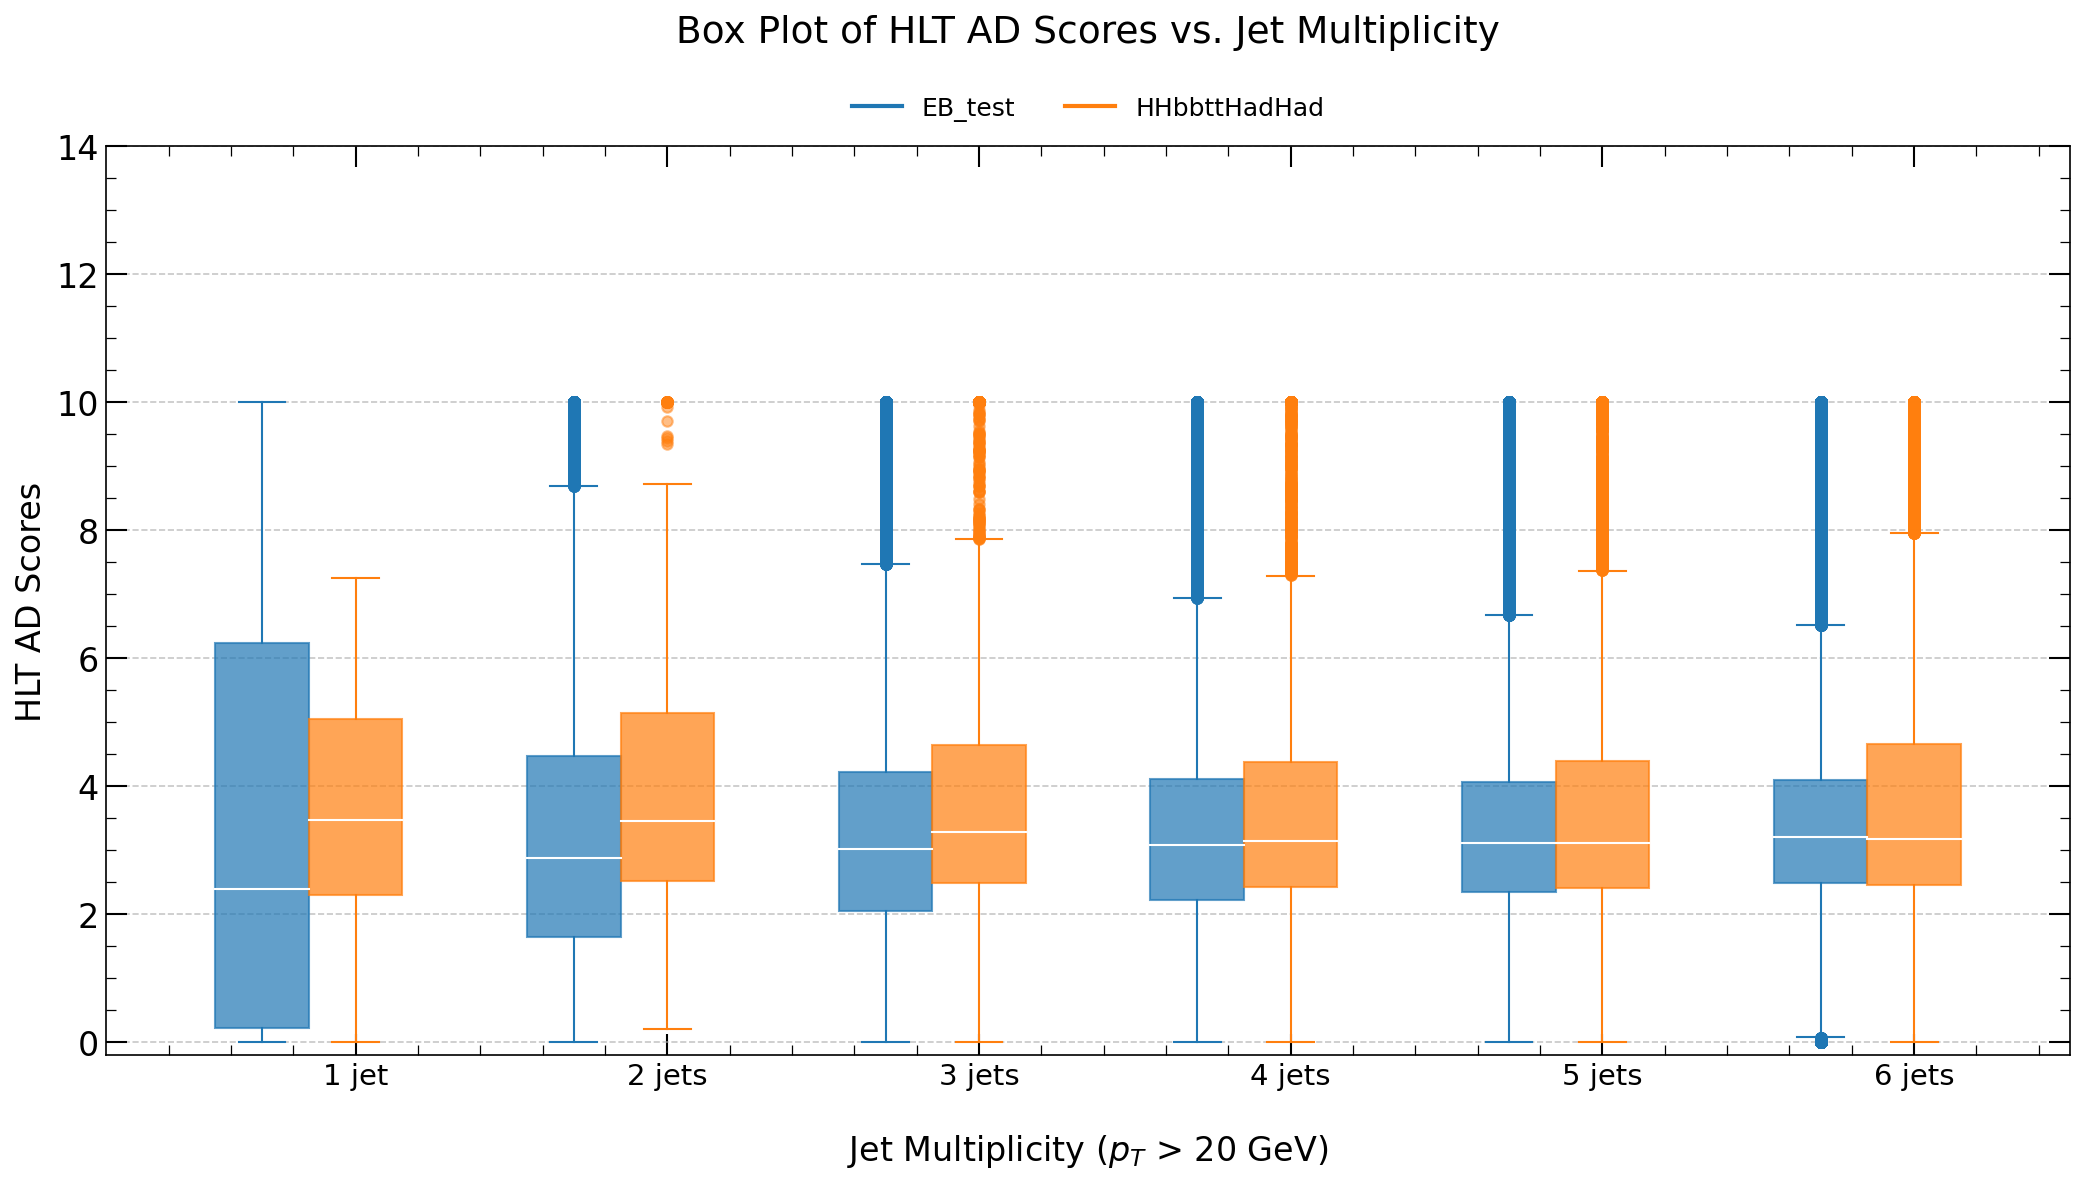

In [16]:
pu.plot_box_AD_score_vs_jet_mult(dataframes, ['EB_test', 'HHbbttHadHad'], score_limit=10, ylog=False)


Is it because we cap the AD score at 10? Let's plot a much wider ranges to see:

/Users/cdavid/Workarea/atlas/ad_for_triggers/atlas_ad_hlt_studies/utils/plot_utils.py:1583: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-score_limit * 0.02, score_limit * 100)


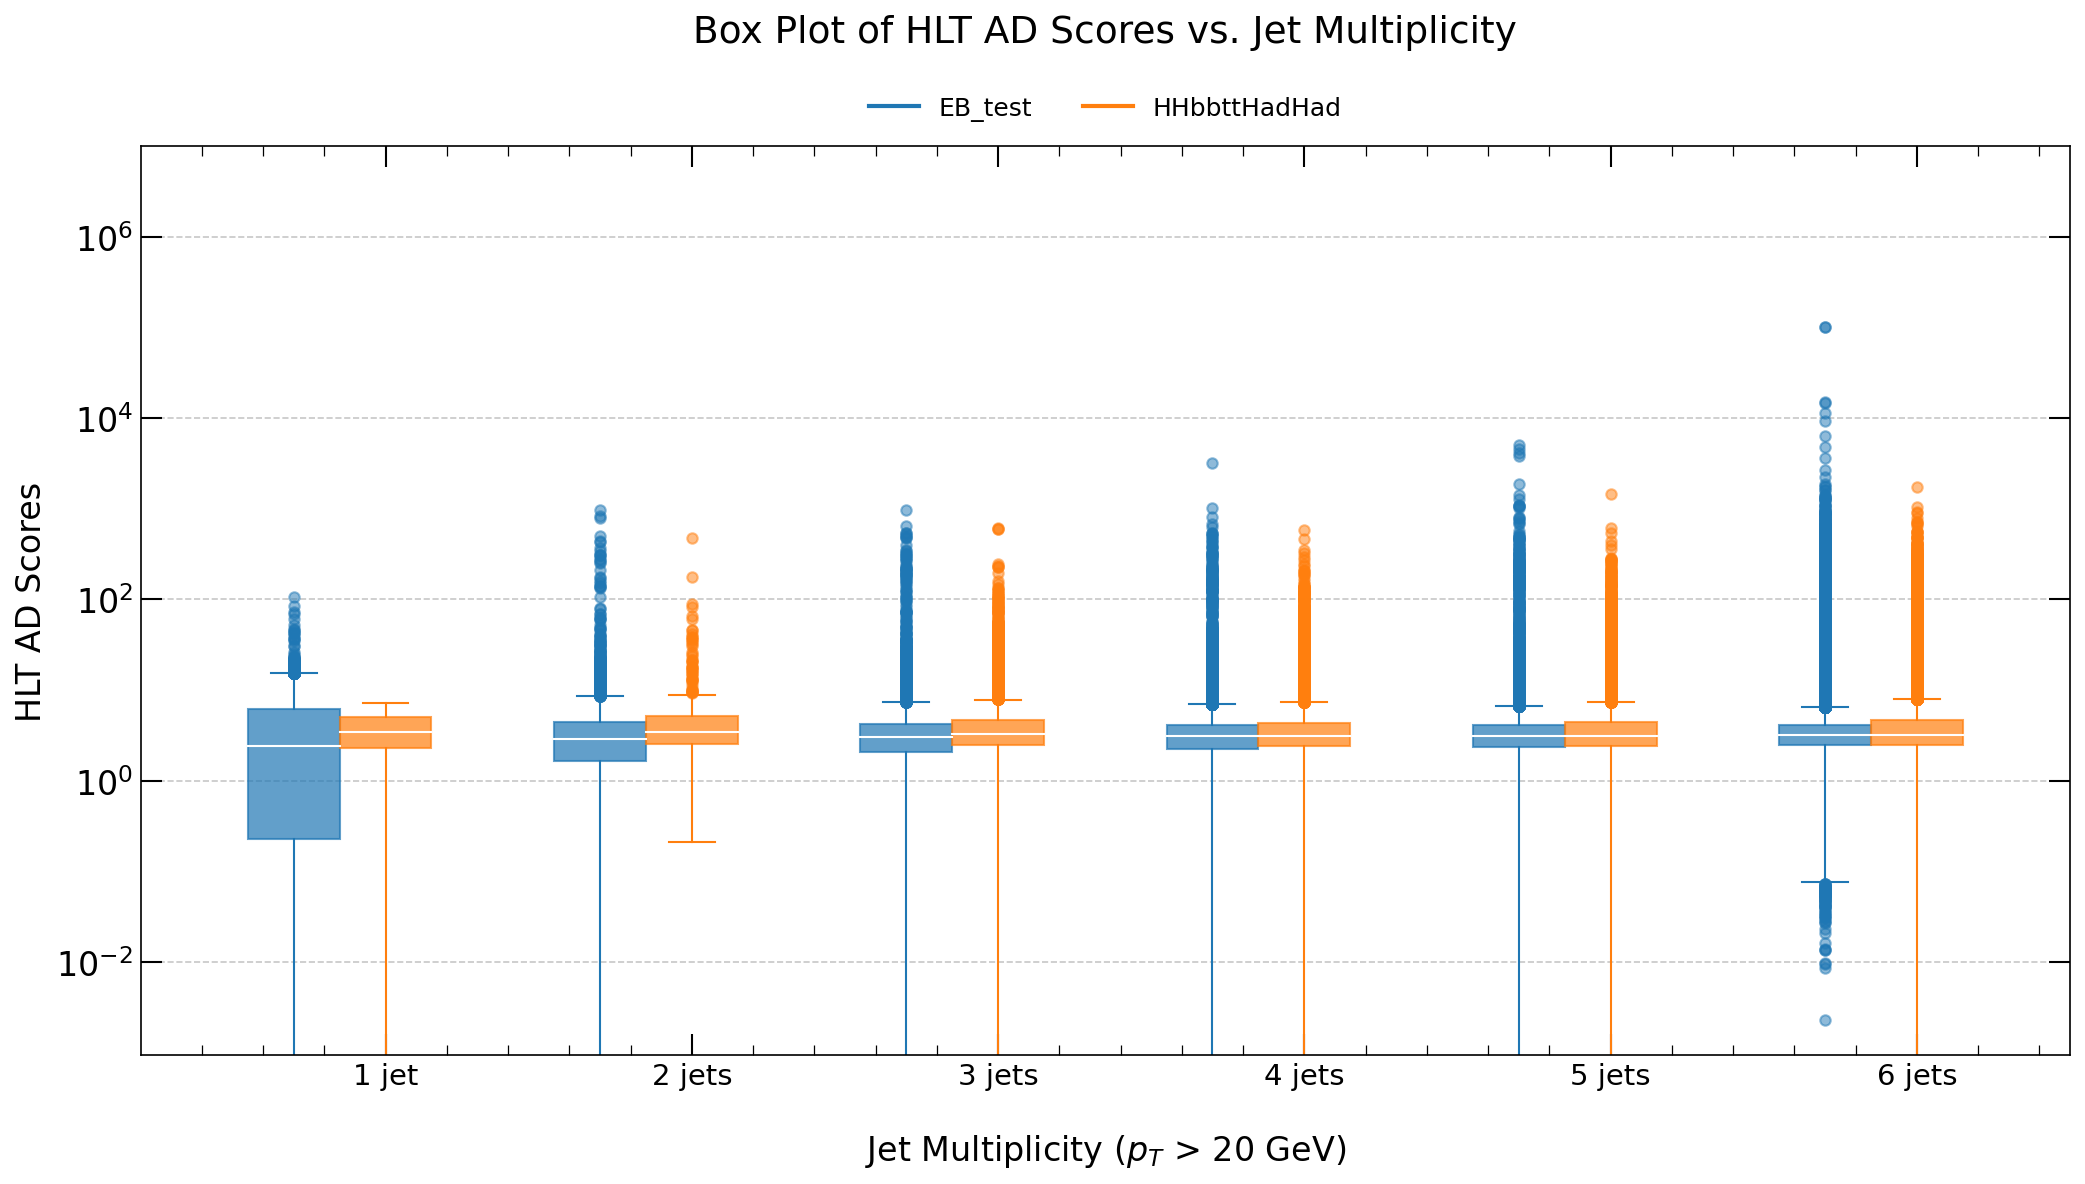

In [17]:
pu.plot_box_AD_score_vs_jet_mult(dataframes, ['EB_test', 'HHbbttHadHad'], score_limit=100000, ylog=True)

## AD scores vs kinematic variable
How are the AD score correlated with kinematic variables?

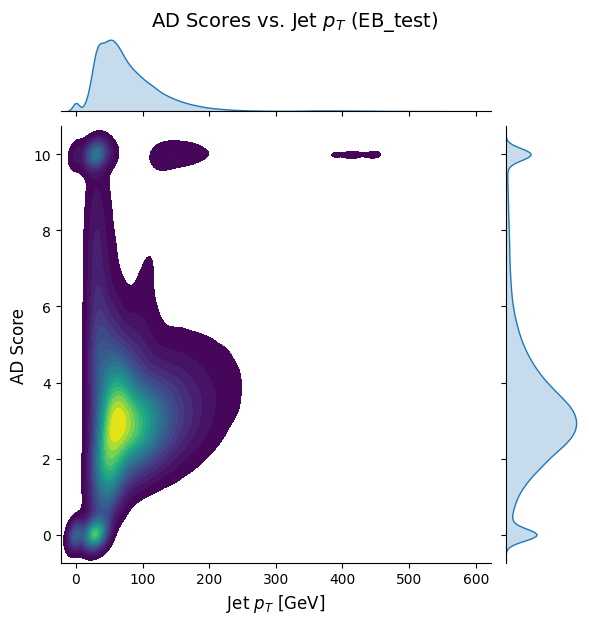

In [19]:
pu.sns_ad_score_jointplot(dataframes, 
                             dataset_tag='EB_test', 
                             column_name='j0pt', 
                             variable_name='Jet $p_T$ [GeV]', 
                             score_limit=10, 
                             x_max=600)

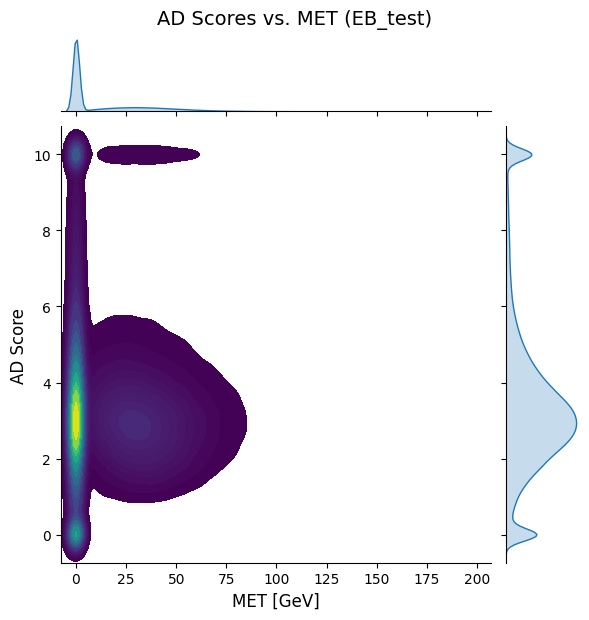

In [21]:
pu.sns_ad_score_jointplot(dataframes, 
                             dataset_tag='EB_test', 
                             column_name='METpt', 
                             variable_name='MET [GeV]', 
                             score_limit=10, 
                             x_max=200)

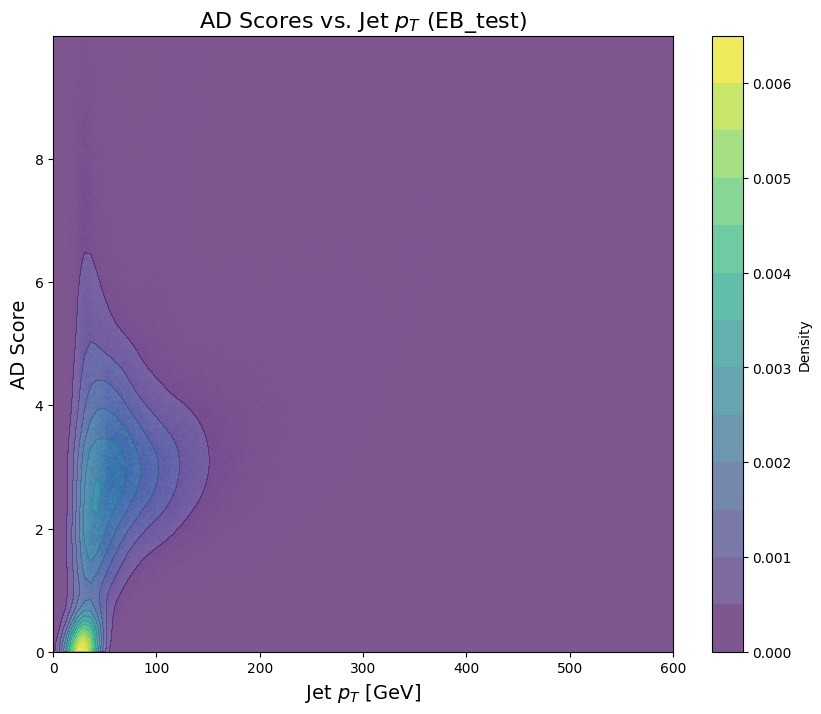

In [22]:
pu.ad_score_vs_kin_var_contour(dataframes, 
                             dataset_tag='EB_test', 
                             column_name='j0pt', 
                             variable_name='Jet $p_T$ [GeV]', 
                             score_limit=10, 
                             x_max=600)